In [1]:

import matplotlib.pyplot as plt

import numpy as np
from ipywidgets import  interactive,    Play,interact_manual,FloatSlider
from matplotlib.ticker import ( FormatStrFormatter )
from IPython.display import (
    Audio, display )
plt.rcParams['axes.grid'] = True

In [2]:
from frequency_waves import square
import frequency_waves
from Util import fold_and_dft, drop_every_kth, zero_padding, v_to_db ,decimate_in_k

In [3]:
%matplotlib notebook

In [4]:
def multiplot(x_arr,y_arr,labels=None,titles=None):
    fig,ax = plt.subplots(len(x_arr))
    for i in range(len(x_arr)):
        ax[i].plot(x_arr[i],y_arr[i])
        if labels is not None:
            ax[i].legend(labels[i])
        if titles is not None:
            ax[i].set_title(titles[i])
    fig.tight_layout(pad=0.5)

In [46]:

D=1
T=2
duration = 5
sr = 44100
x_t = np.random.uniform(-1, 1, sr*duration)
t=np.linspace(0,duration,sr*duration)
ax_freq = np.arange(0,2*np.pi*sr,2*np.pi/(duration))

In [47]:
#g_t =square(t,-D/2,D/2,max(t)+D/2)
g_t = np.sin(np.pi*10000*t)
g_jw = (np.real(np.fft.fft(g_t)))
G_t = square(t,-D/2,D/2,T)
G_jw = (np.real(np.fft.fft(G_t)))

<IPython.core.display.Javascript object>


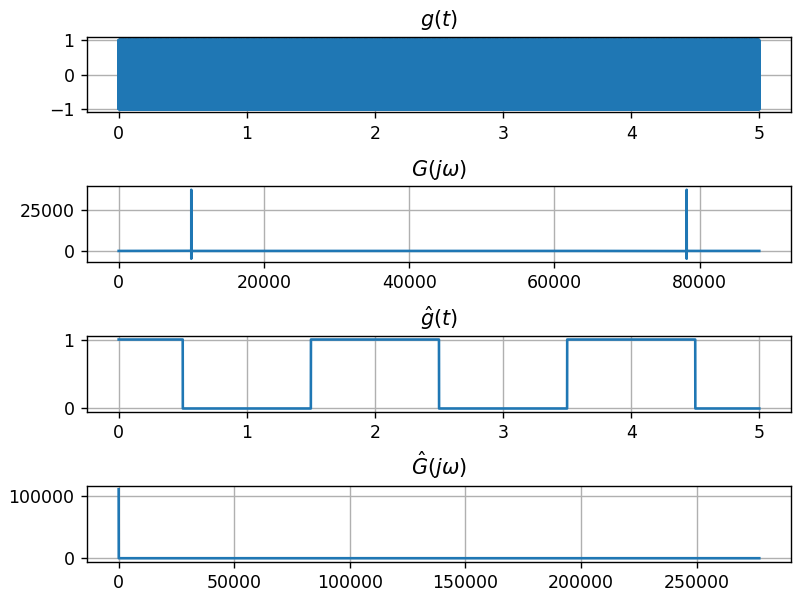

In [48]:

multiplot([t,ax_freq/np.pi,t,ax_freq]
          ,[g_t,g_jw,G_t,G_jw],titles=['$g(t)$','$G(j\omega)$','$\hat{g}(t)$','$\hat{G}(j\omega)$'])


In [25]:
@interact_manual
def m_2(w_c = FloatSlider(min=0,max=(np.pi/T),step=0.05,description='$\omega_c$')):
    m = G_t*np.cos(w_c*t)
    M = v_to_db(np.real(np.fft.fft(m)))
    y = m*x_t
    Y = v_to_db(np.real(np.fft.fft(y)))
    multiplot([t,ax_freq,t,ax_freq]
          ,[m,M,y,M],titles=['$m_2(t)$','$M_2(j\omega)$','$y_2(t)$','$Y_2(j\omega)$'])

interactive(children=(FloatSlider(value=0.0, description='$\\omega_c$', max=1.5707963267948966, step=0.05), Bu…